# Correlation between compartment and other modalities

In [1]:
import cooler
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm as cm
import seaborn as sns
from scipy.stats import zscore, pearsonr, norm

mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'


In [2]:
leg = ['L23_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L56_NP', 'L6_CT', 'L6b', 'L5_ET', 'Amy', 
       'Lamp5', 'Lamp5_LHX6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb_ChC', 'Sst', 'CHD7', 
       'MSN_D1', 'MSN_D2', 'Foxp2', 'SubCtx', 
       'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
      ]
legname = ['L2/3-IT', 'L4-IT', 'L5-IT', 'L6-IT', 'L6-IT-Car3', 'L5/6-NP', 'L6-CT', 'L6b', 'L5-ET', 'Amy-Exc', 
       'Lamp5', 'Lamp5-Lhx6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb-ChC', 'Sst', 'Chd7', 
       'MSN-D1', 'MSN-D2', 'Foxp2', 'SubCtx-Cplx', 
       'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
      ]
leg2name = {xx:yy for xx,yy in zip(leg, legname)}


In [3]:
leg = {'exc': ['L23_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L56_NP', 'L6_CT', 'L6b', 'Amy'], 
       'inh': ['Lamp5', 'Lamp5_LHX6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb_ChC', 'Sst', 'CHD7'], 
       'msn': ['MSN_D1', 'MSN_D2', 'Foxp2'], 
       'sub': ['SubCtx'], 
       'glia': ['ASC', 'ODC', 'OPC'], 
       'mgc': ['MGC'], 
       'smc': ['PC'], 
       'endo': ['EC'], 
       'fibro': ['VLMC'],
      }
leg['neu'] = leg['exc'] + leg['inh'] + leg['msn'] + leg['sub']
leg['all'] = leg['neu'] + leg['glia'] + leg['mgc'] + leg['smc'] + leg['endo'] + leg['fibro']


In [4]:
group_name = 'neu'

In [5]:
leg = pd.Index(leg[group_name])
legname = leg.map(leg2name)
res = 100000

In [6]:
indir = f'/home/jzhou_salk_edu/sky_workdir/hba/compartment_majortype/diff/{group_name}/'


In [7]:
comp = pd.read_csv(f'{indir}DifferentialResult/fdr_result/differential.intra_sample_combined.pcQnm.bedGraph', sep='\t', header=0, index_col=None)
comp.index = comp['chr'] + '_' + (comp['start'] // res).astype(str)
comp


,chr,start,end,L23_IT_100Kb,L4_IT_100Kb,L5_IT_100Kb,L6_IT_100Kb,L6_IT_Car3_100Kb,L56_NP_100Kb,L6_CT_100Kb,...,Sst,CHD7,MSN_D1,MSN_D2,Foxp2,SubCtx,sample_maha,pval,padj,dist_clust
chr10_2,chr10,200000,300000,1.20141,1.40148,1.12274,0.91856,0.71971,1.45364,1.35924,...,1.60003,1.79399,1.18581,1.14140,1.64998,1.77294,78.797991,6.274326e-09,1.654675e-08,1
chr10_3,chr10,300000,400000,1.67618,1.43001,1.33450,1.32691,0.51945,1.22911,1.53759,...,1.69831,1.69831,1.61143,1.15231,1.94190,2.06830,101.685104,6.282661e-13,1.940153e-12,1
chr10_4,chr10,400000,500000,1.27442,1.33094,1.21215,1.43974,0.96214,1.59233,1.40148,...,1.58100,1.61143,1.64171,1.62984,1.69065,1.68152,28.864611,9.045962e-02,1.563036e-01,1
chr10_5,chr10,500000,600000,1.43001,1.39806,1.69428,1.60003,0.57439,1.61143,1.37993,...,1.76052,1.79952,1.58100,1.83248,1.55484,2.17604,110.773702,1.418987e-14,4.640257e-14,1
chr10_6,chr10,600000,700000,1.43350,1.69065,1.44978,1.66232,1.23573,1.26750,1.73916,...,1.90078,1.82624,1.85399,1.42406,1.60286,1.35578,8.253318,9.900547e-01,1.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9_1367,chr9,136700000,136800000,2.53781,2.49765,2.43707,2.53781,2.64364,2.50284,2.61332,...,2.49765,2.30178,2.55214,2.61332,2.42730,2.37386,0.208439,1.000000e+00,1.000000e+00,1
chr9_1368,chr9,136800000,136900000,2.25818,2.34290,2.30178,2.27476,2.20722,2.28698,2.49765,...,2.35196,2.29048,2.25515,2.25515,2.17299,2.22961,1.756256,1.000000e+00,1.000000e+00,1
chr9_1369,chr9,136900000,137000000,2.26494,2.13128,2.34837,2.37084,2.33576,2.35196,2.46547,...,2.39138,2.22605,2.35521,2.31751,2.40634,2.33914,0.318975,1.000000e+00,1.000000e+00,1
chr9_1370,chr9,137000000,137100000,2.35196,2.04449,2.36778,2.18888,2.30471,2.28174,2.42333,...,2.35761,2.25818,2.30178,2.18888,2.30759,2.36778,0.952000,1.000000e+00,1.000000e+00,1


In [8]:
binall = comp[['chr', 'start', 'end', 'sample_maha', 'pval', 'padj']]
comp = comp[leg]


In [9]:
from ALLCools.mcds import MCDS
from ALLCools.mcds.utilities import calculate_posterior_mc_frac


In [10]:
mcds = MCDS.open('/data/hba/mc_majortype/MajorType.mcds', var_dim='chrom5k')
mcds['chrom100k'] = mcds['chrom5k_chrom'].to_pandas().astype(str) + '_' + (mcds['chrom5k_start'] // res).to_pandas().astype(str)
mcds


<xarray.MCDS>
Dimensions:        (cell: 40, chrom5k: 617669, count_type: 2, mc_type: 2)
Coordinates:
  * cell           (cell) <U10 'Amy' 'ASC' 'CA1' 'CA2' ... 'THM_MB' 'Vip' 'VLMC'
  * chrom5k        (chrom5k) object 'chr1_0' 'chr1_1' ... 'chrY_11445'
    chrom5k_chrom  (chrom5k) <U5 'chr1' 'chr1' 'chr1' ... 'chrY' 'chrY' 'chrY'
    chrom5k_end    (chrom5k) int64 5000 10000 15000 ... 57225000 57227415
    chrom5k_start  (chrom5k) int64 0 5000 10000 ... 57215000 57220000 57225000
  * count_type     (count_type) <U3 'mc' 'cov'
  * mc_type        (mc_type) <U3 'CGN' 'CHN'
Data variables:
    chrom5k_da     (cell, chrom5k, mc_type, count_type) uint32 dask.array<chunksize=(5, 77209, 1, 1), meta=np.ndarray>
    chrom100k      (chrom5k) object 'chr1_0' 'chr1_0' ... 'chrY_572' 'chrY_572'
Attributes:
    obs_dim:  cell
    var_dim:  chrom5k

### mCG

In [11]:
mc = mcds['chrom5k_da'].sel(count_type='mc', mc_type='CGN').to_pandas().T
mc['chrom100k'] = mcds['chrom100k'].to_pandas()
mc = mc.groupby('chrom100k').sum().T
cov = mcds['chrom5k_da'].sel(count_type='cov', mc_type='CGN').to_pandas().T
cov['chrom100k'] = mcds['chrom100k'].to_pandas()
cov = cov.groupby('chrom100k').sum().T


In [12]:
binfilter = ['_'.join(xx.split('_')[:-1]) for xx in mc.columns]
binfilter = [(len(xx)<6) and (xx not in ['chrM','chrX','chrY']) for xx in binfilter]
print(np.sum(binfilter))
mc = mc.loc[leg, binfilter]
cov = cov.loc[leg, binfilter]
print(mc.shape, cov.shape)


28760
(21, 28760) (21, 28760)


In [13]:
mcg = calculate_posterior_mc_frac(mc.values, cov.values)
mcg = pd.DataFrame(mcg, index=leg, columns=mc.columns)
mcg = mcg[binall.index].T


### mCH

In [14]:
mc = mcds['chrom5k_da'].sel(count_type='mc', mc_type='CHN').to_pandas().T
mc['chrom100k'] = mcds['chrom100k'].to_pandas()
mc = mc.groupby('chrom100k').sum().T
cov = mcds['chrom5k_da'].sel(count_type='cov', mc_type='CHN').to_pandas().T
cov['chrom100k'] = mcds['chrom100k'].to_pandas()
cov = cov.groupby('chrom100k').sum().T


In [15]:
binfilter = ['_'.join(xx.split('_')[:-1]) for xx in mc.columns]
binfilter = [(len(xx)<6) and (xx not in ['chrM','chrX','chrY']) for xx in binfilter]
print(np.sum(binfilter))
mc = mc.loc[leg, binfilter]
cov = cov.loc[leg, binfilter]
print(mc.shape, cov.shape)


28760
(21, 28760) (21, 28760)


In [16]:
mch = calculate_posterior_mc_frac(mc.values, cov.values)
mch = pd.DataFrame(mch, index=leg, columns=mc.columns)
mch = mch[binall.index].T


### ATAC

In [17]:
sig = pd.read_hdf('/home/jzhou_salk_edu/sky_workdir/hba/atac_majortype/cluster_atac_signal.hdf')
cov = pd.read_hdf('/home/jzhou_salk_edu/sky_workdir/hba/atac_majortype/cluster_atac_cov.hdf')

In [18]:
bins = pd.DataFrame(index=sig.columns)
bins['chrom'] = bins.index.str.split('_').str[0]
bins['start'] = (bins.index.str.split('_').str[1].astype(int) - 1) * 5000
bins['chrom100k'] = bins['chrom'] + '_' + (bins['start'] // res).astype(str)

In [19]:
sig = sig.groupby(by=bins['chrom100k'], axis=1).sum()
cov = cov.groupby(by=bins['chrom100k']).sum()
atac = (sig/cov).fillna(0)

In [20]:
legatac = leg[leg.isin(atac.index)]
atac = atac.loc[legatac, binall.index].T
atac = atac / atac.sum(axis=0)

In [21]:
outdir = './'

In [22]:
mcg.to_hdf(f'{outdir}comp_mCG.hdf', key='data')
mch.to_hdf(f'{outdir}comp_mCH.hdf', key='data')
atac.to_hdf(f'{outdir}comp_ATAC.hdf', key='data')

In [23]:
binall['mCG_corr'] = [pearsonr(xx, yy)[0] for xx,yy in zip(comp.values, mcg.values)]
binall['mCH_corr'] = [pearsonr(xx, yy)[0] for xx,yy in zip(comp.values, mch.values)]
if atac.shape[1]==comp.shape[1]:
    binall['ATAC_corr'] = [pearsonr(xx, yy)[0] for xx,yy in zip(comp.values, atac.values)]

In [24]:
binall['logPadj'] = -np.log10(binall['padj'])
binall.loc[binall['logPadj']>300, 'logPadj'] = 300

In [25]:
binall['mCG_std'] = np.std(mcg, axis=1)
binall['mCH_std'] = np.std(mch, axis=1)
binall['ATAC_std'] = np.std(atac, axis=1)
binall['comp_std'] = np.std(comp, axis=1)
binall

,chr,start,end,sample_maha,pval,padj,mCG_corr,mCH_corr,ATAC_corr,logPadj,mCG_std,mCH_std,ATAC_std,comp_std
chr10_2,chr10,200000,300000,78.797991,6.274326e-09,1.654675e-08,0.189020,-0.307897,0.083061,7.781287,0.020524,0.069741,0.000007,0.372115
chr10_3,chr10,300000,400000,101.685104,6.282661e-13,1.940153e-12,0.287263,-0.255900,-0.157650,11.712164,0.032419,0.084277,0.000013,0.345404
chr10_4,chr10,400000,500000,28.864611,9.045962e-02,1.563036e-01,-0.492743,-0.395472,0.361907,0.806031,0.028772,0.080842,0.000012,0.285201
chr10_5,chr10,500000,600000,110.773702,1.418987e-14,4.640257e-14,-0.021354,-0.314666,0.287532,13.333458,0.034190,0.098258,0.000012,0.322221
chr10_6,chr10,600000,700000,8.253318,9.900547e-01,1.000000e+00,-0.100094,-0.142201,0.179416,-0.000000,0.040324,0.077744,0.000017,0.236699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9_1367,chr9,136700000,136800000,0.208439,1.000000e+00,1.000000e+00,-0.064657,0.237518,0.096892,-0.000000,0.023485,0.057986,0.000010,0.094490
chr9_1368,chr9,136800000,136900000,1.756256,1.000000e+00,1.000000e+00,0.344439,0.447092,-0.465422,-0.000000,0.041249,0.046669,0.000012,0.119900
chr9_1369,chr9,136900000,137000000,0.318975,1.000000e+00,1.000000e+00,0.525077,0.260201,-0.377476,-0.000000,0.028921,0.059762,0.000011,0.095886
chr9_1370,chr9,137000000,137100000,0.952000,1.000000e+00,1.000000e+00,0.361288,0.461071,-0.361203,-0.000000,0.042212,0.047043,0.000013,0.119908


In [26]:
binall.to_hdf(f'{outdir}bin_stats.hdf', key='data')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


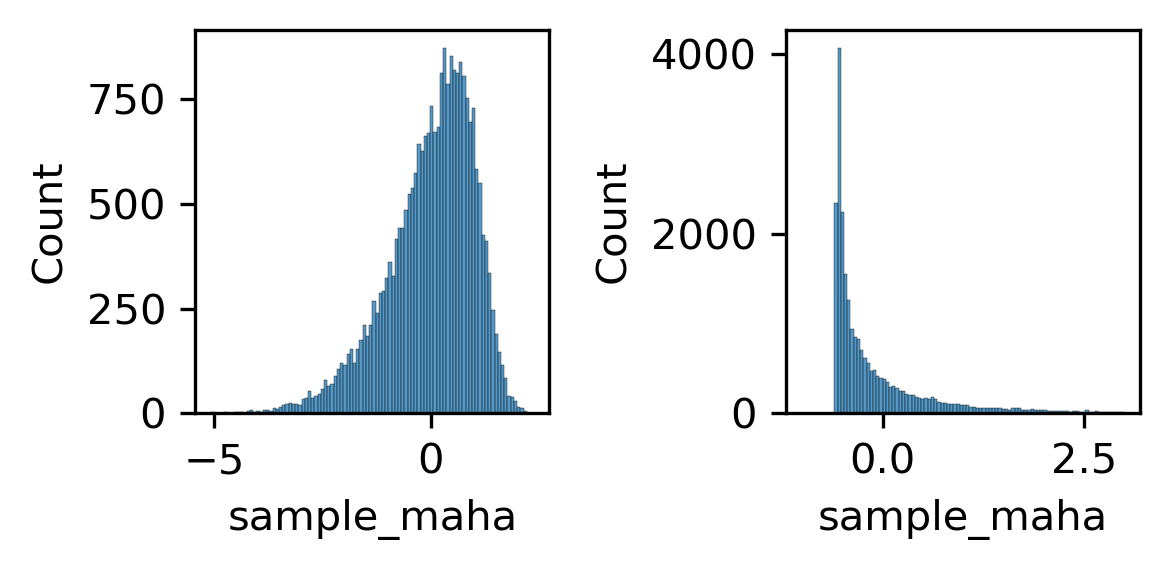

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(4, 2), dpi=300)
ax = axes[0]
sns.histplot(zscore(np.log10(binall['sample_maha'])), bins=100, ax=ax)
ax = axes[1]
sns.histplot(zscore(binall['sample_maha']), bins=100, binrange=(-1,3), ax=ax)
plt.tight_layout()


In [28]:
print(np.sum(zscore(binall['sample_maha'])>norm.isf(0.025)))


1024


<AxesSubplot:xlabel='logPadj', ylabel='sample_maha'>

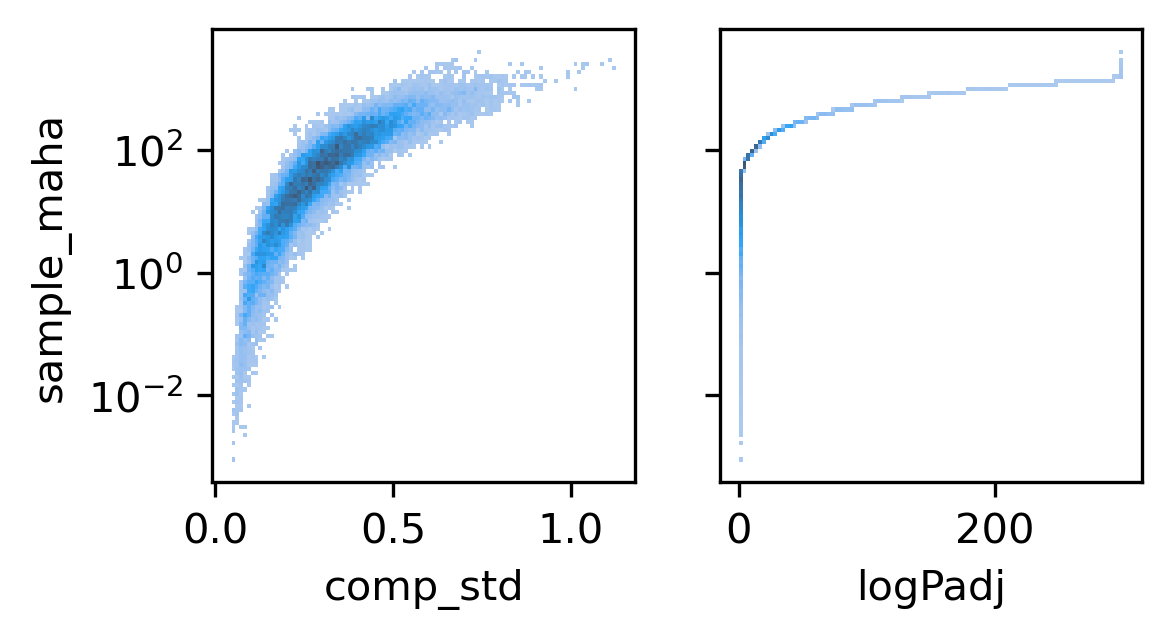

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(4,2), sharey='all', dpi=300)
ax = axes[0]
sns.histplot(binall, x='comp_std', y='sample_maha', bins=100, ax=ax, log_scale=(False, 10))
ax = axes[1]
sns.histplot(binall, x='logPadj', y='sample_maha', bins=100, ax=ax, log_scale=(False, 10))


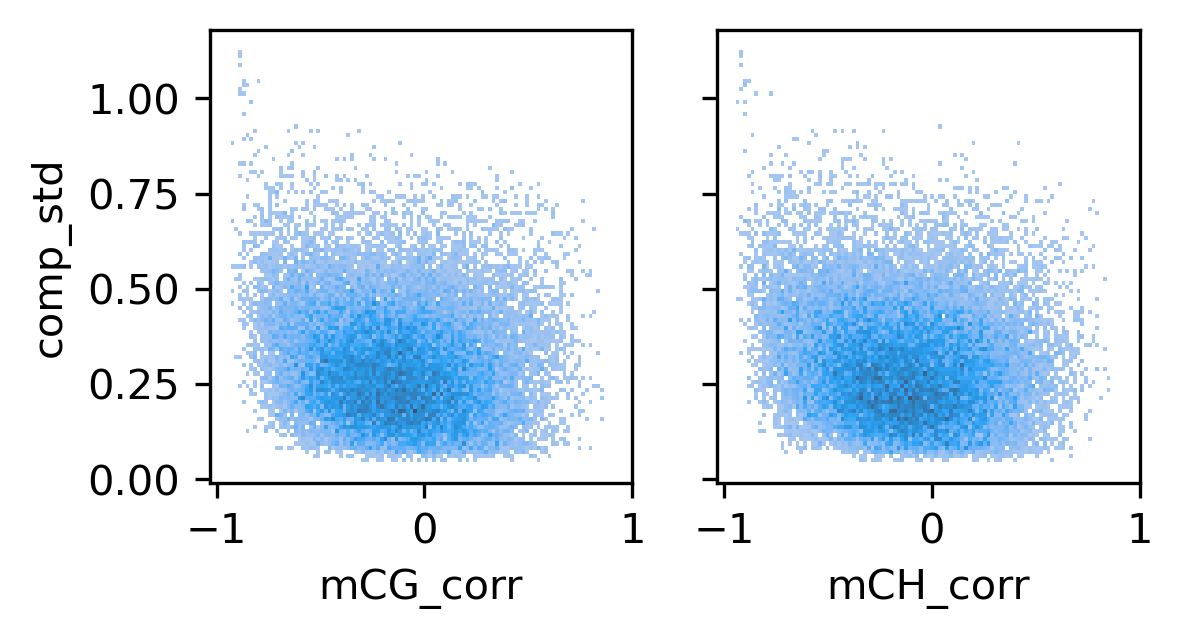

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(4,2), sharex='all', sharey='all', dpi=300)
ax = axes[0]
sns.histplot(binall, x='mCG_corr', y='comp_std', bins=100, ax=ax)
ax = axes[1]
sns.histplot(binall, x='mCH_corr', y='comp_std', bins=100, ax=ax)
ax.set_xticks([-1, 0, 1])
# plt.savefig(f'majortype_{group_name}_diffcomp_stdcorr.pdf', transparent=True)


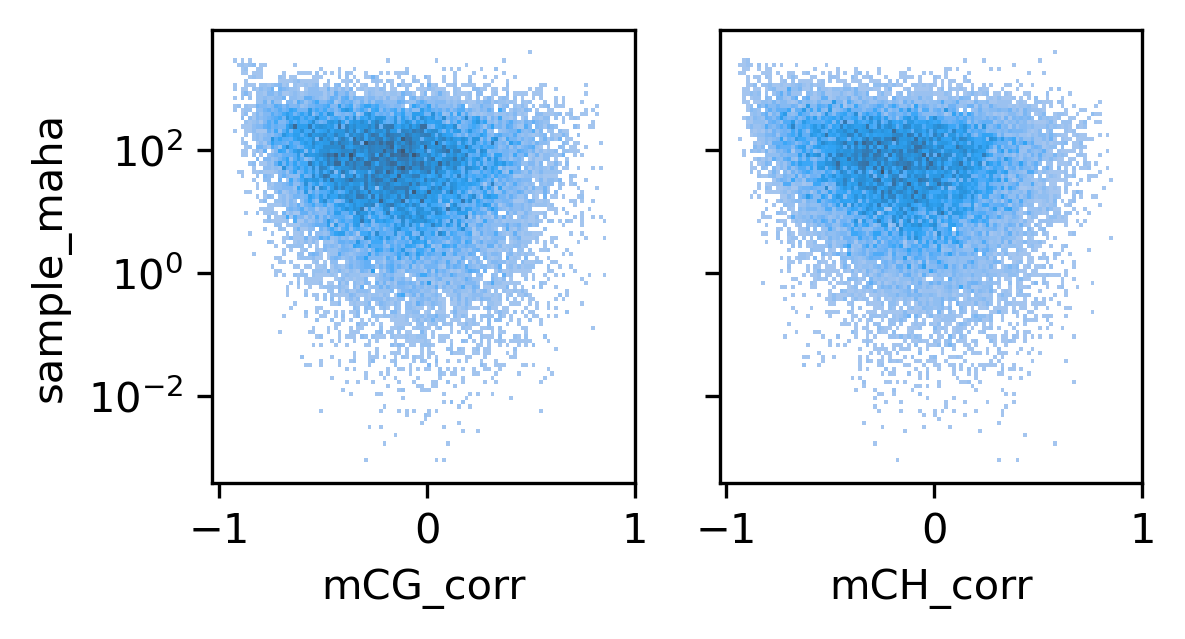

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(4,2), sharex='all', sharey='all', dpi=300)
ax = axes[0]
sns.histplot(binall, x='mCG_corr', y='sample_maha', bins=100, log_scale=(False, 10), ax=ax)
ax = axes[1]
sns.histplot(binall, x='mCH_corr', y='sample_maha', bins=100, log_scale=(False, 10), ax=ax)
ax.set_xticks([-1, 0, 1])
# plt.savefig(f'majortype_{group_name}_diffcomp_statscorr.pdf', transparent=True)
